In [1]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import scale_df_analysis as sda
import sys
os = sys.platform
if 'win' in os:
    windows=True
else:
    windows=False

In [4]:
df = pd.read_csv('curated.csv', index_col=0)

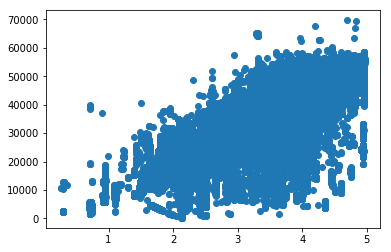

244896
105117
104551


In [5]:
plt.scatter(df['init_enr'], df['bu'])
plt.show()
print(len(df))
df = df.loc[df['reactor_type'] == 'PWR']
print(len(df))
df = df.loc[(df['init_enr'] > 1.5) & (df['bu'] > 10000)]
print(len(df))

In [6]:
df.head()

,reactor_type,total_mass,evaluation_date,init_enr,bu,zr-95,zr-93,ra-226,ru-103,ru-106,...,tc-99,sm-151,se-79,sr-90,sn-126,th-232,th-230,u-232,u-233,other
163647,PWR,464.84799,1992-03-08,3.8023,41919.101,0.000169,0.096829,3.190784e-12,0.000010,0.011643,...,0.096011,0.001785,0.000577,0.062751,0.002731,5.318036e-07,1.740267e-07,1.445304e-07,4.668025e-07,3.743975
163648,PWR,465.51000,1992-03-08,3.8006,38000.400,0.000156,0.088901,3.398129e-12,0.000009,0.010098,...,0.088417,0.001701,0.000531,0.058238,0.002428,5.080243e-07,1.866053e-07,1.202960e-07,4.592145e-07,3.394692
163649,PWR,466.22299,1993-09-25,3.8008,43271.898,0.000116,0.099510,6.269906e-12,0.000007,0.009283,...,0.098385,0.001771,0.000592,0.062967,0.002836,5.524881e-07,2.374266e-07,1.902208e-07,4.809913e-07,3.864627
163650,PWR,464.98098,1992-03-08,3.8174,37646.199,0.000155,0.088220,3.436438e-12,0.000008,0.009938,...,0.087745,0.001696,0.000527,0.057896,0.002397,5.073165e-07,1.888501e-07,1.182436e-07,4.607631e-07,3.363233
163651,PWR,464.53201,1992-03-08,3.8019,40967.101,0.000166,0.094918,3.240070e-12,0.000009,0.011262,...,0.094191,0.001765,0.000566,0.061672,0.002657,5.263706e-07,1.770091e-07,1.385161e-07,4.653567e-07,3.659167


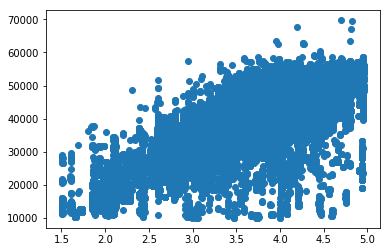

In [7]:
plt.scatter(df['init_enr'], df['bu'])
plt.show()

In [ ]:
def df_to_scale(df, index, filepath, assembly, days=550):
    assem_dict = 

In [ ]:
err_dict = {}
i = 0

indx = 163650
for day in [300, 350, 400, 450, 500, 550]:
    for assembly in ['bw15x15', 's14x14', 's18x18', 'w14x14',
                     'w15x15', 'w17x17', 'ce14x14', 'ce16x16']:
        assem_dict = sda.df_row_to_com_dict(df[indx])
        enr = df[indx]['init_enr']
        bu = df[indx]['bu']
        
        filename = 'temp'
        sda.create_scale_input(filename+'.inp', enr=enr, bu=bu,
                               days=day, assembly=assembly)
        sda.run_scale(filename+'.inp', windows=windows)
        scale_dict = sda.read_scale_out(filename+'.out', after_decay=True)
        err = sda.compare_dicts(assem_dict_data, scale_dict)
        err_dict[i] = {'day': day, 'assembly': assembly,
                       'error': err, 'error_sum': sum(err.valules())}
        i += 1

In [ ]:
rank_dict = {}
for key, val in err_dict.items():
    rank_dict[key] = abs(val['error_sum'])
min_val = min(rank_dict.values())
key = [k for k, v in rank_dict.items() if v == min_val]
print(key)
winner = err_dict[key[0]]
winner

In [ ]:
! del zh.out zh.inp
assem_dict_data = df_to_scale(df, 163650, './zh.inp', winner['assembly'],
                              days=winner['day'])
! C:\SCALE-6.2.2\bin\scalerte zh.inp
scale_dict = read_scale_out('zh.out', True)
err = compare_comp_dicts(assem_dict_data, scale_dict)
err_dict[i] = {'day': day, 'assembly': assembly,
               'error': err}